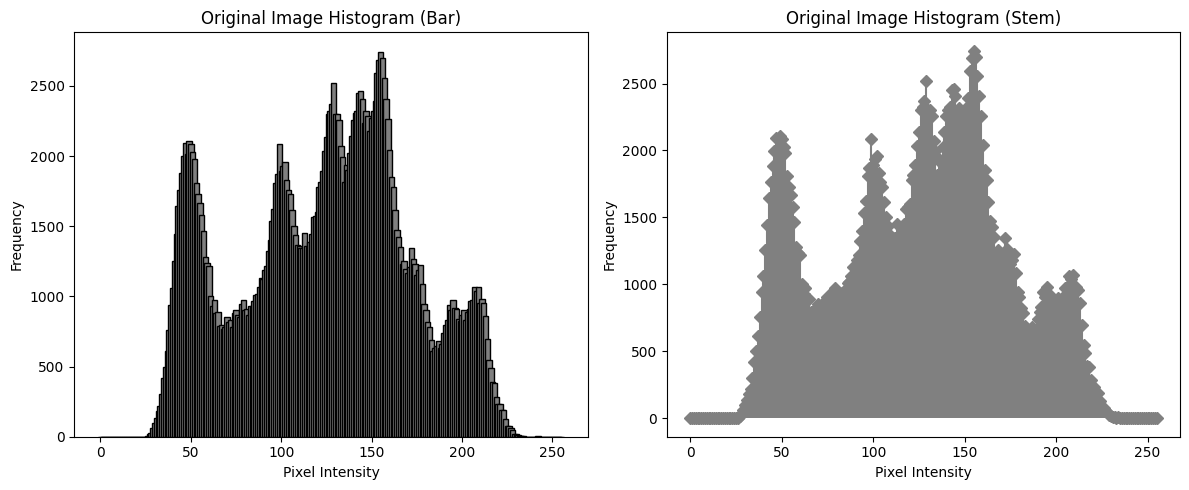

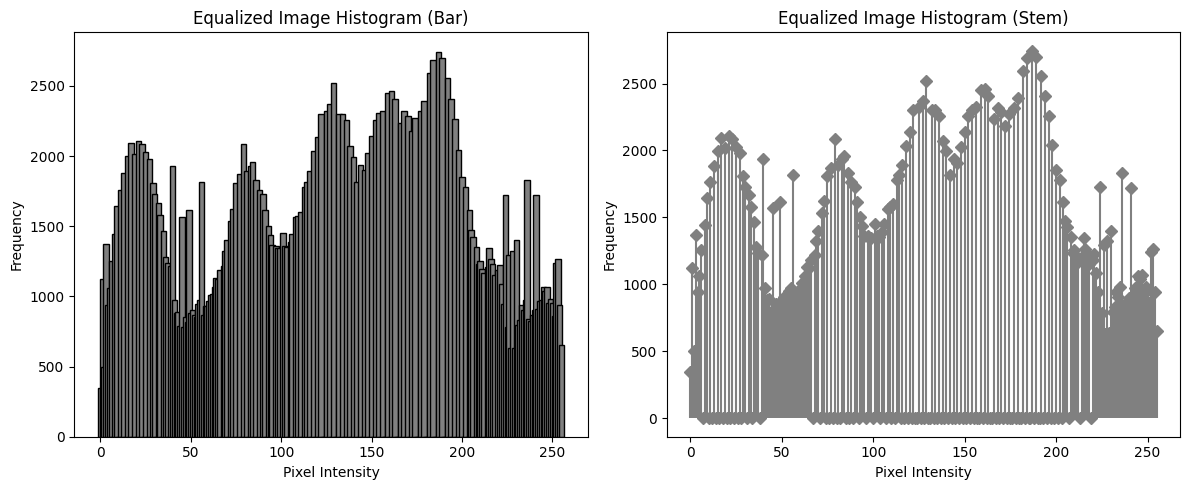

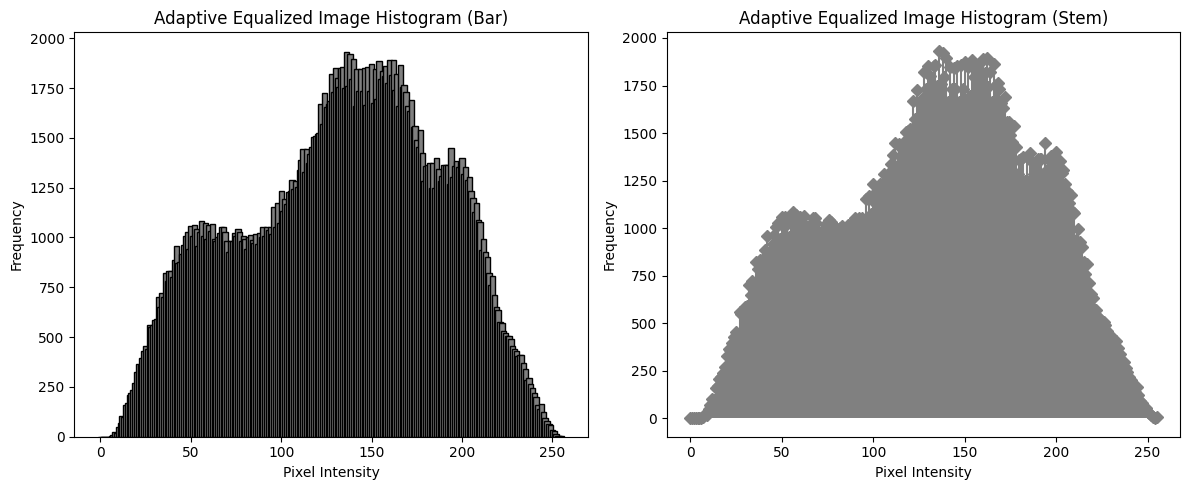

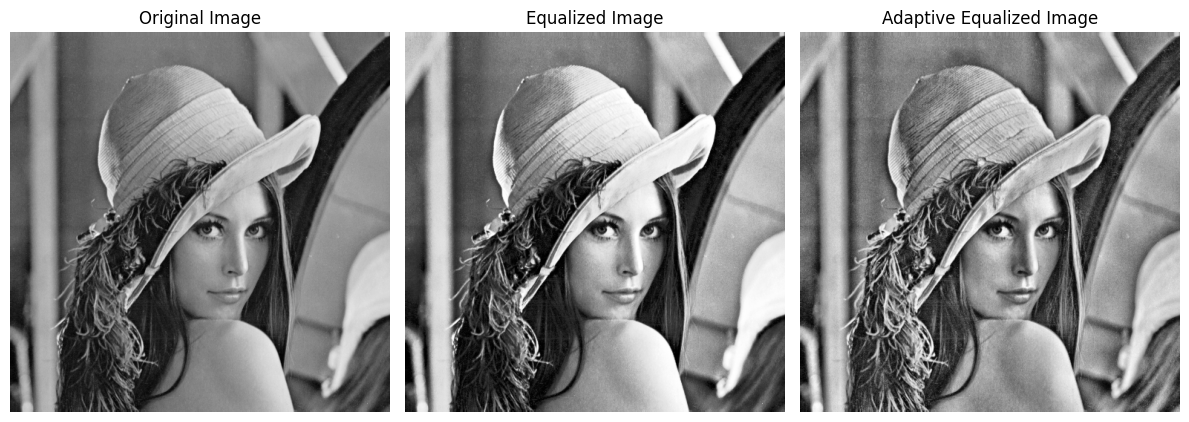

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure

# Load a grayscale image
image_path = "standard_test_images/lena_gray_512.tif"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Function to plot histograms using bar and stem
def plot_histogram(image, title="Histogram"):
    hist, bins = np.histogram(image.flatten(), bins=256, range=[0, 256])
    plt.figure(figsize=(12, 5))
    
    # Plot using bar
    plt.subplot(1, 2, 1)
    plt.bar(bins[:-1], hist, width=3, color='gray', edgecolor='black')
    plt.title(f"{title} (Bar)")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    
    # Plot using stem
    plt.subplot(1, 2, 2)
    plt.stem(bins[:-1], hist, linefmt='gray', markerfmt='D', basefmt=" ")
    plt.title(f"{title} (Stem)")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# Histogram Equalization using OpenCV
equalized_image = cv2.equalizeHist(image)

# Plot histograms before and after equalization
plot_histogram(image, title="Original Image Histogram")
plot_histogram(equalized_image, title="Equalized Image Histogram")

# Adaptive Histogram Equalization using CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16, 16))
adaptive_equalized_image = clahe.apply(image)

plot_histogram(adaptive_equalized_image, title="Adaptive Equalized Image Histogram")

# Display images
plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title("Equalized Image")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(adaptive_equalized_image, cmap='gray')
plt.title("Adaptive Equalized Image")
plt.axis("off")

plt.tight_layout()
plt.show()


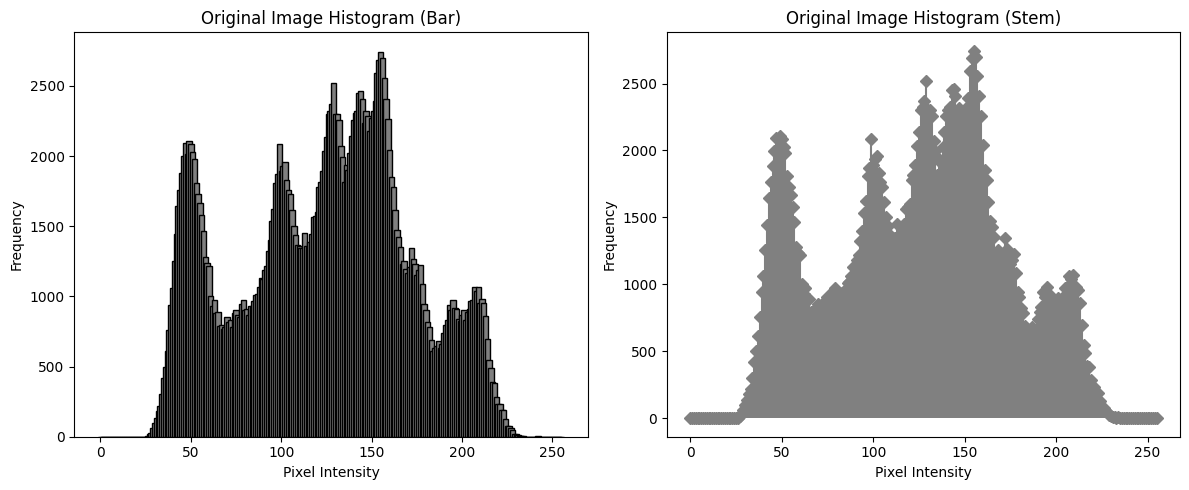

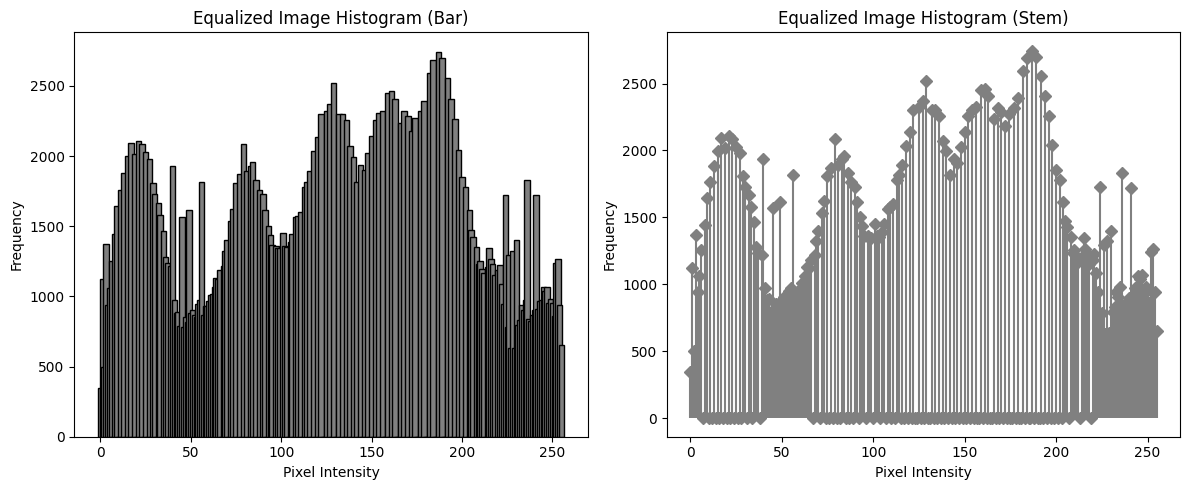

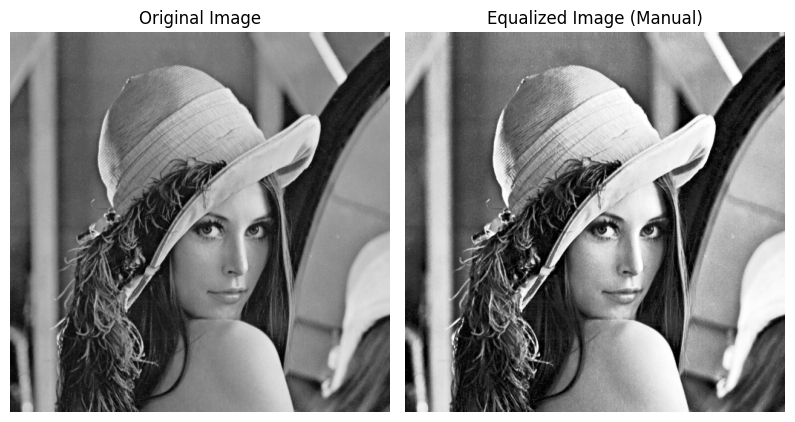

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load a grayscale image
image_path = "standard_test_images/lena_gray_512.tif"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Function to compute histogram manually
def compute_histogram(image):
    hist = np.zeros(256, dtype=int)  # Array to store the count of pixel intensities
    for pixel in image.flatten():
        hist[pixel] += 1
    return hist

# Function to plot histogram using bar and stem
def plot_histogram_manual(hist, title="Histogram"):
    bins = np.arange(256)
    plt.figure(figsize=(12, 5))
    
    # Plot using bar
    plt.subplot(1, 2, 1)
    plt.bar(bins, hist, width=3, color='gray', edgecolor='black')
    plt.title(f"{title} (Bar)")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    
    # Plot using stem
    plt.subplot(1, 2, 2)
    plt.stem(bins, hist, linefmt='gray', markerfmt='D', basefmt=" ")
    plt.title(f"{title} (Stem)")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# Manual Histogram Equalization
def histogram_equalization_manual(image):
    hist = compute_histogram(image)
    cdf = np.cumsum(hist)  # Compute the cumulative distribution function
    cdf_min = cdf[cdf > 0][0]  # Minimum non-zero value in CDF
    total_pixels = image.size
    equalized = np.zeros_like(image, dtype=np.uint8)
    
    # Normalize CDF to the range [0, 255]
    cdf_normalized = np.round(((cdf - cdf_min) / (total_pixels - cdf_min)) * 255).astype(np.uint8)
    
    # Map original pixel values to equalized values
    for i in range(256):
        equalized[image == i] = cdf_normalized[i]
    
    return equalized


# Compute histograms
original_hist = compute_histogram(image)
equalized_image = histogram_equalization_manual(image)
equalized_hist = compute_histogram(equalized_image)

# Plot histograms before and after equalization
plot_histogram_manual(original_hist, title="Original Image Histogram")
plot_histogram_manual(equalized_hist, title="Equalized Image Histogram")

# Display images
plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title("Equalized Image (Manual)")
plt.axis("off")


plt.tight_layout()
plt.show()
